In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tensorflow import keras

## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [3]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test ", x_test.shape)
print("y_test ", y_test.shape)

x_train (60000, 28, 28)
y_train (60000,)
x_test  (10000, 28, 28)
y_test  (10000,)


### Find dimensions of an image in the dataset

In [4]:
x_train[1].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [5]:
num_classes = np.unique(y_test).shape[0]

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Normalize both the train and test image data from 0-255 to 0-1

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
x_train = x_train / 255
x_test = x_test / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [11]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [31]:
model = Sequential([
  Conv2D(32, 3, input_shape=(28, 28, 1)),
  Activation('relu'),
  Conv2D(32, 3),
  Activation('relu'),
  Flatten(),
  Dense(128),
  Dense(10),
  Activation('softmax')
])

In [32]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
model.build()

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2359424   
                                                                 
 dense_5 (Dense)             (None, 10)               

In [35]:
early_stopping = EarlyStopping(
  monitor='val_accuracy',
  patience=5,
  verbose=1,
  mode='auto'
)

In [65]:
callbacks = [early_stopping]  

In [37]:
batch_size = 32
epochs = 10

model.fit(
  x_train, y_train, 
  batch_size=batch_size, 
  epochs=epochs,
  validation_data=(x_test, y_test),
  callbacks=callbacks
)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3761 - accuracy: 0.8669 - val_loss: 0.3172 - val_accuracy: 0.8885
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2469 - accuracy: 0.9107 - val_loss: 0.2731 - val_accuracy: 0.9028
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1921 - accuracy: 0.9298 - val_loss: 0.2801 - val_accuracy: 0.9051
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1542 - accuracy: 0.9431 - val_loss: 0.3032 - val_accuracy: 0.9015
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1248 - accuracy: 0.9547 - val_loss: 0.3159 - val_accuracy: 0.9029
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1014 - accuracy: 0.9629 - val_loss: 0.3486 - val_accuracy: 0.8990
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0840 - accuracy: 0.9689 - val_loss: 0.4179 -

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [66]:
model_v1 = Sequential([
  Conv2D(32, 3, input_shape=(28, 28, 1)),
  Activation('relu'),
  Conv2D(32, 3),
  Activation('relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(128),
  Dense(10),
  Activation('softmax')
])

In [67]:
model_v1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [68]:
model_v1.build()

In [69]:
model_v1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 activation_18 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 activation_19 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                      

In [46]:
batch_size = 32
epochs = 10

model_v1.fit(
  x_train, y_train, 
  batch_size=batch_size, 
  epochs=epochs,
  validation_data=(x_test, y_test),
  callbacks=callbacks
)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3936 - accuracy: 0.8596 - val_loss: 0.3022 - val_accuracy: 0.8925
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2755 - accuracy: 0.9019 - val_loss: 0.2772 - val_accuracy: 0.9010
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2413 - accuracy: 0.9125 - val_loss: 0.2884 - val_accuracy: 0.8965
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2196 - accuracy: 0.9189 - val_loss: 0.2500 - val_accuracy: 0.9107
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2051 - accuracy: 0.9255 - val_loss: 0.2331 - val_accuracy: 0.9187
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1917 - accuracy: 0.9301 - val_loss: 0.2471 - val_accuracy: 0.9140
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1825 - accuracy: 0.9318 - val_loss: 0.2447 - val_ac

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [52]:
from keras.preprocessing.image import ImageDataGenerator 

In [58]:
datagen = ImageDataGenerator(
  featurewise_center=False,
  samplewise_center=False,
  featurewise_std_normalization=False,
  samplewise_std_normalization=False,
  zca_whitening=False,
  rotation_range=60,
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=False,
  vertical_flip=False,
)

In [61]:
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

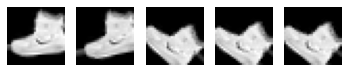

In [62]:
generator = datagen.flow(x_train[0:1], batch_size=1)

for i in range(1, 6):
  plt.subplot(1, 5, i)
  plt.axis("off")
  plt.imshow(generator.next().squeeze(), cmap='gray')
  plt.plot()

plt.show()

### Run the above model using fit_generator()

In [59]:
batch_size = 32

In [71]:
model_v1.fit(
  datagen.flow(
    x_train, y_train,
    batch_size=batch_size
  ),
  steps_per_epoch=x_train.shape[0]/batch_size,
  epochs=10,
  validation_data=(x_test, y_test),
  callbacks=callbacks
)

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.6515 - accuracy: 0.7601 - val_loss: 0.5849 - val_accuracy: 0.7979
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.6094 - accuracy: 0.7770 - val_loss: 0.5176 - val_accuracy: 0.8214
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5799 - accuracy: 0.7879 - val_loss: 0.5069 - val_accuracy: 0.8265
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5626 - accuracy: 0.7944 - val_loss: 0.4928 - val_accuracy: 0.8274
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5509 - accuracy: 0.8000 - val_loss: 0.4711 - val_accuracy: 0.8378
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.5416 - accuracy: 0.8018 - val_loss: 0.5238 - val_accuracy: 0.8110
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.5289 - accuracy: 0.8092 - val_loss: 0.4556 -

###  Report the final train and validation accuracy

In [74]:
model_v1.evaluate(x_train, y_train)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.4279 - accuracy: 0.8444


[0.42787861824035645, 0.8444166779518127]

In [75]:
model_v1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.4606 - accuracy: 0.8381


[0.46056464314460754, 0.838100016117096]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [98]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [99]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [100]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [101]:
num_classes = np.unique(y_test).shape[0]

In [102]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [103]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [104]:
x_train = x_train / 255
x_test = x_test / 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [105]:
datagen = ImageDataGenerator(
  featurewise_center=False,
  samplewise_center=False,
  featurewise_std_normalization=False,
  samplewise_std_normalization=False,
  zca_whitening=False,
  rotation_range=60,
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=False,
  vertical_flip=False,
)

### **Prepare/fit the generator.**

In [106]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

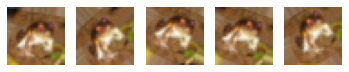

In [107]:
generator = datagen.flow(x_train[0:1], batch_size=1)

for i in range(1, 6):
  plt.subplot(1, 5, i)
  plt.axis("off")
  plt.imshow(generator.next().squeeze(), cmap='gray')
  plt.plot()

plt.show()

In [108]:
batch_size = 32

In [122]:
model_v2 = Sequential([
  Conv2D(32, 3, input_shape=(32, 32, 3)),
  Activation('relu'),
  Conv2D(32, 3),
  Activation('relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(128),
  Dense(num_classes),
  Activation('softmax')
])

In [123]:
model_v2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [124]:
model_v2.build()

In [125]:
model_v2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_33 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_34 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 32)        0         
                                                     

In [126]:
early_stopping = EarlyStopping(
  monitor='val_accuracy',
  patience=5,
  verbose=1,
  mode='auto'
)

callbacks = [early_stopping]  

In [127]:
model_v2.fit(
  datagen.flow(
    x_train, y_train,
    batch_size=batch_size
  ),
  steps_per_epoch=x_train.shape[0]/batch_size,
  epochs=10,
  validation_data=(x_test, y_test),
  callbacks=callbacks
)

Epoch 1/10
1562/1562 [==============================] - 43s 27ms/step - loss: 1.7108 - accuracy: 0.3860 - val_loss: 1.4346 - val_accuracy: 0.4887
Epoch 2/10
1562/1562 [==============================] - 40s 26ms/step - loss: 1.5183 - accuracy: 0.4603 - val_loss: 1.3140 - val_accuracy: 0.5374
Epoch 3/10
1562/1562 [==============================] - 40s 26ms/step - loss: 1.4390 - accuracy: 0.4871 - val_loss: 1.2827 - val_accuracy: 0.5492
Epoch 4/10
1562/1562 [==============================] - 42s 27ms/step - loss: 1.4080 - accuracy: 0.5018 - val_loss: 1.2421 - val_accuracy: 0.5544
Epoch 5/10
1562/1562 [==============================] - 42s 27ms/step - loss: 1.3811 - accuracy: 0.5100 - val_loss: 1.2643 - val_accuracy: 0.5676
Epoch 6/10
1562/1562 [==============================] - 43s 27ms/step - loss: 1.3653 - accuracy: 0.5177 - val_loss: 1.2773 - val_accuracy: 0.5612
Epoch 7/10
1562/1562 [==============================] - 40s 26ms/step - loss: 1.3457 - accuracy: 0.5229 - val_loss: 1.2717 -